In [1]:
import sys
from sklearn.preprocessing import MinMaxScaler
sys.path.append("./../src/")

# Modules of src folder
import data_loader as dl
import run
import visualizations

## Prepare models

In [2]:
ueps = dl.load_ueps_data(from_raw=False)

In [3]:
# See run.py for meaning of these parameters
uk = False
shifts = [1,6,144]
non_nan_percentage = 70
col_to_be_lagged = ["air_density","sonic_wind_speed","power"]
val_ratio = 0.2
scalers = [MinMaxScaler(),MinMaxScaler(),MinMaxScaler()]
model_name = "linreg"

## Run models

In [4]:
models = run.pipeline(
    ueps,
    model_name, 
    uk, 
    shifts, 
    non_nan_percentage, 
    col_to_be_lagged, 
    val_ratio, scalers)

Finished training model 10min horizon
Finished training model 1 hour horizon
Finished training model 1 day horizon


## Evaluate results

In [5]:
visualizations.plot_metrics("Pedra do Sal", models)

| Model Name                  |     RMSE |   Benchmark_RMSE |      MAE |   Benchmark_MAE |
|:----------------------------|---------:|-----------------:|---------:|----------------:|
| Pedra do Sal 10min horizon  |  53.2214 |              nan |  34.7252 |             nan |
| Pedra do Sal 1 hour horizon | 115.794  |              nan |  83.5687 |             nan |
| Pedra do Sal 1 day horizon  | 206.296  |              nan | 161.871  |             nan |


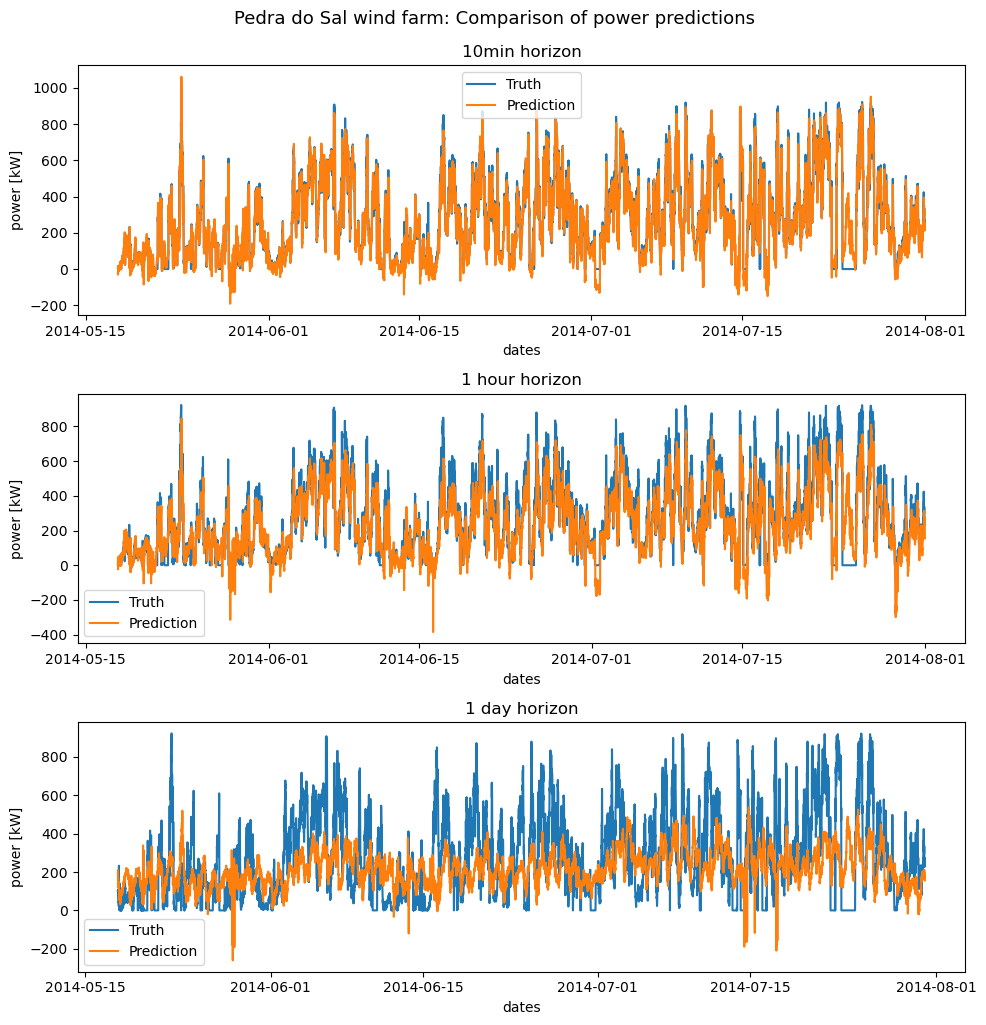

In [6]:
visualizations.plot_models("Pedra do Sal", models)